# Initialization

In [1]:
rm(list = ls())

library(data.table)
library(tidyverse)
library(rJava)
library(RNetLogo)

library(lhs)  # For maximin Latin hypercube sampling
library(ggplot2)
library(plotly)  # For beautiful plotting
library(caret)
library(randomForest)
library(factoextra)
library(e1071)
library(TSrepr)  # for evaluating predictive power

require(gridExtra)

options(warn = -1)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x purrr::flatten()   masks jsonlite::flatten()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()
Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_fram

In [2]:
folder.path = "C:/Users/paslanpatir/Desktop/TEZ_v2/"
data.path = paste0(folder.path,"data/")

nl.model.1 = "Segregation"
model.type.1 = ifelse(nl.model.1 == "Segregation", "basic", "dummy")
output.folder.1 = paste0("outputs/outputs_50_100/outputs_SampleRef_Basic")
outputs.path.1 = paste0(folder.path,output.folder.1,"/")

nl.model.2 = ifelse(nl.model.1 == "Segregation", "Segregation_Dummy", "Segregation")
model.type.2 = ifelse(model.type.1 == "basic", "dummy", "basic")
output.folder.2 = paste0("outputs/outputs_50_100/outputs_SampleRef_Dummy")
outputs.path.2 = paste0(folder.path,output.folder.2,"/")

# Parameters

In [3]:
seed.focus = c(4)
size.focus = 100

feature_names.1 = c("density", "%-similar-wanted")
feature_names.2 = c("density", "%-similar-wanted", "budget-multiplier-dummy", "density-multiplier-dummy", "noise-dummy", "tick-limit")

# Adaptive Sampling Replications

In [4]:
#### Adaptive Sampling ####

## Model.1

In [5]:
#### Model.1 ####
Ad_path.1 = paste0(outputs.path.1,"Ad_sd/")

obb_error_Ad.1              = fread(paste0(Ad_path.1,model.type.1,"_obb_error_Ad",".csv"))
performance_table_Ad.1      = fread(paste0(Ad_path.1,model.type.1,"_performance_table_Ad",".csv"))
predictedLabels_Ad.1        = fread(paste0(Ad_path.1,model.type.1,"_predictedLabels_table_Ad",".csv"))
FinalTrainData_Ad.1         = fread(paste0(Ad_path.1,model.type.1,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.1       = fread(paste0(Ad_path.1,model.type.1,"_train_candidates_table_Ad",".csv"))

obb_error_Ad.1         = obb_error_Ad.1[(seed %in% seed.focus)]
performance_table_Ad.1 = performance_table_Ad.1[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad.1   = predictedLabels_Ad.1[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad.1    = FinalTrainData_Ad.1[(seed %in% seed.focus)]
train_candidates_Ad.1  = train_candidates_Ad.1[(seed %in% seed.focus)]

#melt
performance_molten_Ad_seq.1 <- melt(data = performance_table_Ad.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.1 = performance_molten_Ad_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]


In [6]:
#importance
importance_Ad.1             = fread(paste0(Ad_path.1,model.type.1,"_importance_table_Ad",".csv"))
importance_Ad.1[, iter_no := iter_no - 1]

group_importance_Ad.1 = melt(data = importance_Ad.1, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.1) 
setnames(group_importance_Ad.1, c("variable"),c("feature"))

## Model.2

In [7]:
#### Model.2 ####
Ad_path.2 = paste0(outputs.path.2,"Ad_sd/")

obb_error_Ad.2              = fread(paste0(Ad_path.2,model.type.2,"_obb_error_Ad",".csv"))
performance_table_Ad.2      = fread(paste0(Ad_path.2,model.type.2,"_performance_table_Ad",".csv"))
predictedLabels_Ad.2        = fread(paste0(Ad_path.2,model.type.2,"_predictedLabels_table_Ad",".csv"))
FinalTrainData_Ad.2         = fread(paste0(Ad_path.2,model.type.2,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.2       = fread(paste0(Ad_path.2,model.type.2,"_train_candidates_table_Ad",".csv"))

obb_error_Ad.2         = obb_error_Ad.2[(seed %in% seed.focus)]
performance_table_Ad.2 = performance_table_Ad.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad.2   = predictedLabels_Ad.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad.2    = FinalTrainData_Ad.2[(seed %in% seed.focus)]
train_candidates_Ad.2  = train_candidates_Ad.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad_seq.2 <- melt(data = performance_table_Ad.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.2 = performance_molten_Ad_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [8]:
#importance
importance_Ad.2             = fread(paste0(Ad_path.2,model.type.2,"_importance_table_Ad",".csv"))
importance_Ad.2[, iter_no := iter_no - 1]

group_importance_Ad.2 = melt(data = importance_Ad.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With mtry = 3

In [9]:
#### Adaptive Sampling with mtry=3 ####

## Model.2

In [10]:
#### Model.2 ####
Ad3_path.2 = paste0(outputs.path.2,"Ad_sd_mtry3/")

obb_error_Ad3.2              = fread(paste0(Ad3_path.2,model.type.2,"_obb_error_Ad_sd",".csv"))
performance_table_Ad3.2      = fread(paste0(Ad3_path.2,model.type.2,"_performance_table_Ad_sd",".csv"))
predictedLabels_Ad3.2        = fread(paste0(Ad3_path.2,model.type.2,"_predictedLabels_table_Ad_sd",".csv"))
FinalTrainData_Ad3.2         = fread(paste0(Ad3_path.2,model.type.2,"_FinalTrainData_Ad_sd",".csv"))
train_candidates_Ad3.2       = fread(paste0(Ad3_path.2,model.type.2,"_train_candidates_table_Ad_sd",".csv"))

obb_error_Ad3.2         = obb_error_Ad3.2[(seed %in% seed.focus)]
performance_table_Ad3.2 = performance_table_Ad3.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad3.2   = predictedLabels_Ad3.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad3.2    = FinalTrainData_Ad3.2[(seed %in% seed.focus)]
train_candidates_Ad3.2  = train_candidates_Ad3.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad3_seq.2 <- melt(data = performance_table_Ad3.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad3_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad3_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad3_seq.2 = performance_molten_Ad3_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [11]:
#importance
importance_Ad3.2             = fread(paste0(Ad3_path.2,model.type.2,"_importance_table_Ad_sd",".csv"))
importance_Ad3.2[, iter_no := iter_no - 1]

group_importance_Ad3.2 = melt(data = importance_Ad3.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad3.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With mtry = 4

In [12]:
#### Adaptive Sampling with mtry=4 ####

## Model.2

In [13]:
#### Model.2 ####
Ad4_path.2 = paste0(outputs.path.2,"Ad_sd_mtry4/")

obb_error_Ad4.2              = fread(paste0(Ad4_path.2,model.type.2,"_obb_error_Ad_sd",".csv"))
performance_table_Ad4.2      = fread(paste0(Ad4_path.2,model.type.2,"_performance_table_Ad_sd",".csv"))
predictedLabels_Ad4.2        = fread(paste0(Ad4_path.2,model.type.2,"_predictedLabels_table_Ad_sd",".csv"))
FinalTrainData_Ad4.2         = fread(paste0(Ad4_path.2,model.type.2,"_FinalTrainData_Ad_sd",".csv"))
train_candidates_Ad4.2       = fread(paste0(Ad4_path.2,model.type.2,"_train_candidates_table_Ad_sd",".csv"))

obb_error_Ad4.2         = obb_error_Ad4.2[(seed %in% seed.focus)]
performance_table_Ad4.2 = performance_table_Ad4.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad4.2   = predictedLabels_Ad4.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad4.2    = FinalTrainData_Ad4.2[(seed %in% seed.focus)]
train_candidates_Ad4.2  = train_candidates_Ad4.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad4_seq.2 <- melt(data = performance_table_Ad4.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad4_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad4_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad4_seq.2 = performance_molten_Ad4_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [14]:
#importance
importance_Ad4.2             = fread(paste0(Ad4_path.2,model.type.2,"_importance_table_Ad_sd",".csv"))
importance_Ad4.2[, iter_no := iter_no - 1]

group_importance_Ad4.2 = melt(data = importance_Ad4.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad4.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With mtry = 6

In [15]:
#### Adaptive Sampling with mtry=6 ####

## Model.2

In [16]:
#### Model.2 ####
Ad6_path.2 = paste0(outputs.path.2,"Ad_sd_mtry6/")

obb_error_Ad6.2              = fread(paste0(Ad6_path.2,model.type.2,"_obb_error_Ad_sd",".csv"))
performance_table_Ad6.2      = fread(paste0(Ad6_path.2,model.type.2,"_performance_table_Ad_sd",".csv"))
predictedLabels_Ad6.2        = fread(paste0(Ad6_path.2,model.type.2,"_predictedLabels_table_Ad_sd",".csv"))
FinalTrainData_Ad6.2         = fread(paste0(Ad6_path.2,model.type.2,"_FinalTrainData_Ad_sd",".csv"))
train_candidates_Ad6.2       = fread(paste0(Ad6_path.2,model.type.2,"_train_candidates_table_Ad_sd",".csv"))

obb_error_Ad6.2         = obb_error_Ad6.2[(seed %in% seed.focus)]
performance_table_Ad6.2 = performance_table_Ad6.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad6.2   = predictedLabels_Ad6.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad6.2    = FinalTrainData_Ad6.2[(seed %in% seed.focus)]
train_candidates_Ad6.2  = train_candidates_Ad6.2[(seed %in% seed.focus)]

#melt
performance_molten_Ad6_seq.2 <- melt(data = performance_table_Ad6.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad6_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad6_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad6_seq.2 = performance_molten_Ad6_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [17]:
#importance
importance_Ad6.2             = fread(paste0(Ad6_path.2,model.type.2,"_importance_table_Ad_sd",".csv"))
importance_Ad6.2[, iter_no := iter_no - 1]

group_importance_Ad6.2 = melt(data = importance_Ad6.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad6.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With Range

In [18]:
#### Adaptive Sampling  With Range ####

## Model.1

In [19]:
#### Model.1 ####
Ad_range_path.1 = paste0(outputs.path.1,"Ad_range/")

obb_error_Ad_range.1              = fread(paste0(Ad_range_path.1,model.type.1,"_obb_error_Ad_range",".csv"))
performance_table_Ad_range.1      = fread(paste0(Ad_range_path.1,model.type.1,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad_range.1        = fread(paste0(Ad_range_path.1,model.type.1,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad_range.1         = fread(paste0(Ad_range_path.1,model.type.1,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad_range.1       = fread(paste0(Ad_range_path.1,model.type.1,"_train_candidates_table_Ad_range",".csv"))

obb_error_Ad_range.1         = obb_error_Ad_range.1[(seed %in% seed.focus)]
performance_table_Ad_range.1 = performance_table_Ad_range.1[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_range.1   = predictedLabels_Ad_range.1[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_range.1    = FinalTrainData_Ad_range.1[(seed %in% seed.focus)]
train_candidates_Ad_range.1  = train_candidates_Ad_range.1[(seed %in% seed.focus)]

#melt
performance_molten_Ad_range_seq.1 <- melt(data = performance_table_Ad_range.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_range_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_range_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_range_seq.1 = performance_molten_Ad_range_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [20]:
#importance
importance_Ad_range.1             = fread(paste0(Ad_range_path.1,model.type.1,"_importance_table_Ad_range",".csv"))
importance_Ad_range.1[, iter_no := iter_no - 1]
group_importance_Ad_range.1 = melt(data = importance_Ad_range.1, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.1) 
setnames(group_importance_Ad_range.1, c("variable"),c("feature"))

## Model.2

In [21]:
#### Model.2 ####
Ad_range_path.2 = paste0(outputs.path.2,"Ad_range/")

obb_error_Ad_range.2              = fread(paste0(Ad_range_path.2,model.type.2,"_obb_error_Ad_range",".csv"))
performance_table_Ad_range.2      = fread(paste0(Ad_range_path.2,model.type.2,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad_range.2        = fread(paste0(Ad_range_path.2,model.type.2,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad_range.2         = fread(paste0(Ad_range_path.2,model.type.2,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad_range.2       = fread(paste0(Ad_range_path.2,model.type.2,"_train_candidates_table_Ad_range",".csv"))

obb_error_Ad_range.2         = obb_error_Ad_range.2[(seed %in% seed.focus)]
performance_table_Ad_range.2 = performance_table_Ad_range.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_range.2   = predictedLabels_Ad_range.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_range.2    = FinalTrainData_Ad_range.2[(seed %in% seed.focus)]
train_candidates_Ad_range.2  = train_candidates_Ad_range.2[(seed %in% seed.focus)]

performance_molten_Ad_range_seq.2 <- melt(data = performance_table_Ad_range.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_range_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_range_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_range_seq.2 = performance_molten_Ad_range_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [22]:
#importance
importance_Ad_range.2             = fread(paste0(Ad_range_path.2,model.type.2,"_importance_table_Ad_range",".csv"))
importance_Ad_range.2[, iter_no := iter_no - 1]
group_importance_Ad_range.2 = melt(data = importance_Ad_range.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad_range.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With Range with mtry = 4

In [23]:
#### Adaptive Sampling  With Range ####

## Model.2

In [24]:
#### Model.2 ####
Ad4_range_path.2 = paste0(outputs.path.2,"Ad_range_mtry4/")

obb_error_Ad4_range.2              = fread(paste0(Ad4_range_path.2,model.type.2,"_obb_error_Ad_range",".csv"))
performance_table_Ad4_range.2      = fread(paste0(Ad4_range_path.2,model.type.2,"_performance_table_Ad_range",".csv"))
predictedLabels_Ad4_range.2        = fread(paste0(Ad4_range_path.2,model.type.2,"_predictedLabels_table_Ad_range",".csv"))
FinalTrainData_Ad4_range.2         = fread(paste0(Ad4_range_path.2,model.type.2,"_FinalTrainData_Ad_range",".csv"))
train_candidates_Ad4_range.2       = fread(paste0(Ad4_range_path.2,model.type.2,"_train_candidates_table_Ad_range",".csv"))

obb_error_Ad4_range.2         = obb_error_Ad4_range.2[(seed %in% seed.focus)]
performance_table_Ad4_range.2 = performance_table_Ad4_range.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad4_range.2   = predictedLabels_Ad4_range.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad4_range.2    = FinalTrainData_Ad4_range.2[(seed %in% seed.focus)]
train_candidates_Ad4_range.2  = train_candidates_Ad4_range.2[(seed %in% seed.focus)]

performance_molten_Ad4_range_seq.2 <- melt(data = performance_table_Ad4_range.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad4_range_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad4_range_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad4_range_seq.2 = performance_molten_Ad4_range_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [25]:
#importance
importance_Ad4_range.2             = fread(paste0(Ad4_range_path.2,model.type.2,"_importance_table_Ad_range",".csv"))
importance_Ad4_range.2[, iter_no := iter_no - 1]

group_importance_Ad4_range.2 = melt(data = importance_Ad4_range.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad4_range.2, c("variable"),c("feature"))

# Adaptive Sampling Replications With Coefvar

In [26]:
#### Adaptive Sampling  With Coefvar ####

## Model.1

In [27]:
#### Model.1 ####
Ad_coefvar_path.1 = paste0(outputs.path.1,"Ad_coefvar/")

obb_error_Ad_coefvar.1              = fread(paste0(Ad_coefvar_path.1,model.type.1,"_obb_error_Ad_coefvar",".csv"))
performance_table_Ad_coefvar.1      = fread(paste0(Ad_coefvar_path.1,model.type.1,"_performance_table_Ad_coefvar",".csv"))
predictedLabels_Ad_coefvar.1        = fread(paste0(Ad_coefvar_path.1,model.type.1,"_predictedLabels_table_Ad_coefvar",".csv"))
FinalTrainData_Ad_coefvar.1         = fread(paste0(Ad_coefvar_path.1,model.type.1,"_FinalTrainData_Ad_coefvar",".csv"))
train_candidates_Ad_coefvar.1       = fread(paste0(Ad_coefvar_path.1,model.type.1,"_train_candidates_table_Ad_coefvar",".csv"))

obb_error_Ad_coefvar.1         = obb_error_Ad_coefvar.1[(seed %in% seed.focus)]
performance_table_Ad_coefvar.1 = performance_table_Ad_coefvar.1[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_coefvar.1   = predictedLabels_Ad_coefvar.1[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_coefvar.1    = FinalTrainData_Ad_coefvar.1[(seed %in% seed.focus)]
train_candidates_Ad_coefvar.1  = train_candidates_Ad_coefvar.1[(seed %in% seed.focus)]

#melt
performance_molten_Ad_coefvar_seq.1 <- melt(data = performance_table_Ad_coefvar.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_coefvar_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_coefvar_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_coefvar_seq.1 = performance_molten_Ad_coefvar_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [28]:
#importance
importance_Ad_coefvar.1             = fread(paste0(Ad_coefvar_path.1,model.type.1,"_importance_table_Ad_coefvar",".csv"))
importance_Ad_coefvar.1[, iter_no := iter_no - 1]
group_importance_Ad_coefvar.1 = melt(data = importance_Ad_coefvar.1, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.1) 
setnames(group_importance_Ad_coefvar.1, c("variable"),c("feature"))

## Model.2

In [29]:
#### Model.2 ####
Ad_coefvar_path.2 = paste0(outputs.path.2,"Ad_coefvar/")

obb_error_Ad_coefvar.2              = fread(paste0(Ad_coefvar_path.2,model.type.2,"_obb_error_Ad_coefvar",".csv"))
performance_table_Ad_coefvar.2      = fread(paste0(Ad_coefvar_path.2,model.type.2,"_performance_table_Ad_coefvar",".csv"))
predictedLabels_Ad_coefvar.2        = fread(paste0(Ad_coefvar_path.2,model.type.2,"_predictedLabels_table_Ad_coefvar",".csv"))
FinalTrainData_Ad_coefvar.2         = fread(paste0(Ad_coefvar_path.2,model.type.2,"_FinalTrainData_Ad_coefvar",".csv"))
train_candidates_Ad_coefvar.2       = fread(paste0(Ad_coefvar_path.2,model.type.2,"_train_candidates_table_Ad_coefvar",".csv"))

obb_error_Ad_coefvar.2         = obb_error_Ad_coefvar.2[(seed %in% seed.focus)]
performance_table_Ad_coefvar.2 = performance_table_Ad_coefvar.2[(size == size.focus) & (seed %in% seed.focus)]
predictedLabels_Ad_coefvar.2   = predictedLabels_Ad_coefvar.2[(size == size.focus) & (seed %in% seed.focus)]
FinalTrainData_Ad_coefvar.2    = FinalTrainData_Ad_coefvar.2[(seed %in% seed.focus)]
train_candidates_Ad_coefvar.2  = train_candidates_Ad_coefvar.2[(seed %in% seed.focus)]

performance_molten_Ad_coefvar_seq.2 <- melt(data = performance_table_Ad_coefvar.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_coefvar_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_coefvar_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_coefvar_seq.2 = performance_molten_Ad_coefvar_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [30]:
#importance
importance_Ad_coefvar.2             = fread(paste0(Ad_coefvar_path.2,model.type.2,"_importance_table_Ad_coefvar",".csv"))
importance_Ad_coefvar.2[, iter_no := iter_no - 1]
group_importance_Ad_coefvar.2 = melt(data = importance_Ad_coefvar.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad_coefvar.2, c("variable"),c("feature"))

# Comparisons

In [31]:
nl.model.2.1 = ifelse(nl.model.1 == "Segregation", "Segregation_Dummy", "Segregation")
model.type.2.1 = ifelse(model.type.1 == "basic", "dummy", "basic")
output.folder.2.1 = paste0("outputs_mtry2_4_imprep_SampleRef_dummy_Ad_sd_2020-03-07")
outputs.path.2.1 = paste0(folder.path,output.folder.2.1,"/")

In [32]:
#### Model.2 ####
Ad_path.2.1 = outputs.path.2.1

#importance
imp_scaled_type1.2.1             = fread(paste0(Ad_path.2.1,model.type.2,"_model_imp_scaled_type1_table_Ad_sd",".csv"))
imp_unscaled_type1.2.1           = fread(paste0(Ad_path.2.1,model.type.2,"_model_imp_unscale_type1_table_Ad_sd",".csv"))
imp_scaled_type2.2.1             = fread(paste0(Ad_path.2.1,model.type.2,"_model_imp_scaled_type2_table_Ad_sd",".csv"))
imp_unscaled_type2.2.1           = fread(paste0(Ad_path.2.1,model.type.2,"_model_imp_unscale_type2_table_Ad_sd",".csv"))

imp.2.1 = rbind(data.table(imp_scaled_type1.2.1  ,"type" = "scaled_type1")
               ,data.table(imp_unscaled_type1.2.1,"type" = "unscaled_type1")
               ,data.table(imp_scaled_type2.2.1  ,"type" = "scaled_type2")
               ,data.table(imp_unscaled_type2.2.1,"type" = "unscaled_type2"))

imp.2.1[, iter_no := iter_no - 1]
group_imp.2.1 = melt(data = imp.2.1, id.vars = c("seed","rep","iter_no","imp_rep","type"), measure.vars = feature_names.2) 
setnames(group_imp.2.1, c("variable"),c("feature"))

In [33]:
nl.model.2.2 = "Segregation_Dummy"
model.type.2.2 = "dummy"
output.folder.2.2 = paste0("imrep/outputs_mtry4_imprep_0_1_2_3_4_Ad_range_SampleRef_dummy_2020-03-07")
outputs.path.2.2 = paste0(folder.path,output.folder.2.2,"/")

In [34]:
#### Model.2 ####
Ad_path.2.2 = outputs.path.2.2

#importance
imp_scaled_type1.2.2             = fread(paste0(Ad_path.2.2,model.type.2,"_model_imp_scaled_type1_table_Ad_range",".csv"))
imp_unscaled_type1.2.2           = fread(paste0(Ad_path.2.2,model.type.2,"_model_imp_unscale_type1_table_Ad_range",".csv"))
imp_scaled_type2.2.2             = fread(paste0(Ad_path.2.2,model.type.2,"_model_imp_scaled_type2_table_Ad_range",".csv"))
imp_unscaled_type2.2.2           = fread(paste0(Ad_path.2.2,model.type.2,"_model_imp_unscale_type2_table_Ad_range",".csv"))

imp.2.2 = rbind(data.table(  imp_scaled_type1.2.2  ,"type" = "scaled_type1")
               ,data.table(imp_unscaled_type1.2.2,"type" = "unscaled_type1")
               ,data.table(  imp_scaled_type2.2.2  ,"type" = "scaled_type2")
               ,data.table(imp_unscaled_type2.2.2,"type" = "unscaled_type2"))

imp.2.2[, iter_no := iter_no - 1]
group_imp.2.2 = melt(data = imp.2.2, id.vars = c("seed","rep","iter_no","imp_rep","type"), measure.vars = feature_names.2) 
setnames(group_imp.2.2, c("variable"),c("feature"))

In [35]:
group_imp.2.2 = group_imp.2.2[seed == 4]

In [36]:
mtry_group_imp.2=rbind(data.table(group_imp.2.1, mtry = "2"),
      data.table(group_imp.2.2, mtry = "4_range"))


## Model.2

### Individual Importance (between imp types)

*mtry = 2 olduğu sürece, replication yapmaktan bağımsız, density ve budget-multiplier hep karıştırılabilir*

* Seed4'ün ne farkı var diğer daha setlerden? density mtry=3,4 ve 6'da bile zar zor ayırt edilebiliyor
* importance measure'lardan bağımsız density dummyler gibi çıkıyor.
* importance measure'larını araştır. yüzde gibi bir şey ile nasıl ifade edebiliriz importance'ı?

In [37]:
a = group_imp.2.1[,.(mean_value = mean(value, na.rm = TRUE)),.(iter_no,feature,rep,type)]

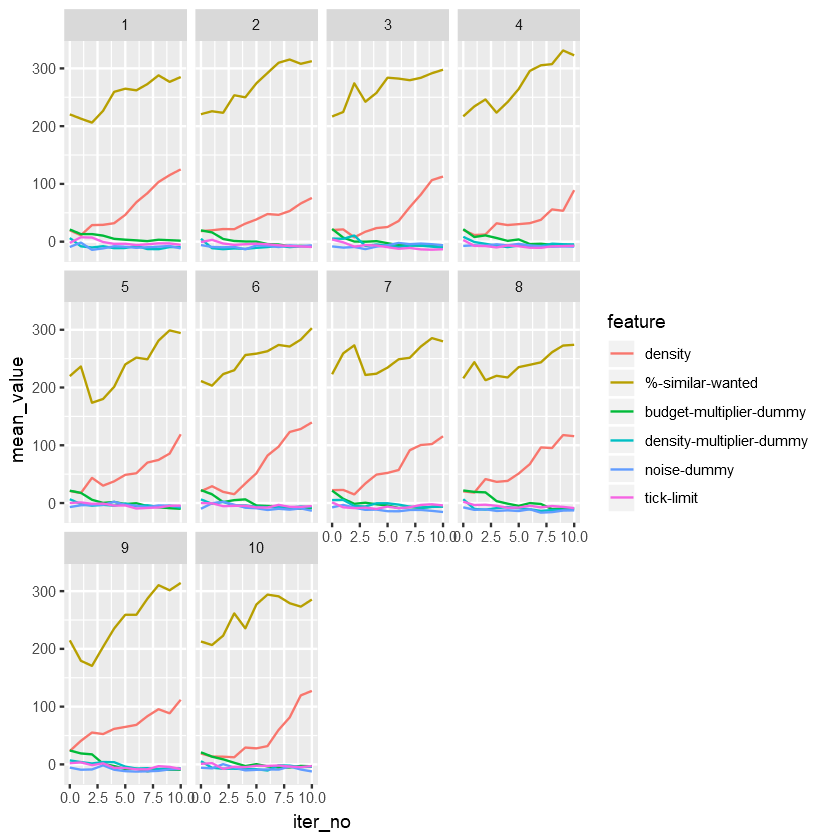

In [38]:
ggplot(a[type == c("unscaled_type1")], aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() + facet_wrap(~rep)

In [39]:
head(group_imp.2.1)

seed,rep,iter_no,imp_rep,type,feature,value
<int>,<int>,<dbl>,<int>,<chr>,<fct>,<dbl>
4,1,0,1,scaled_type1,density,4.997658
4,1,0,2,scaled_type1,density,3.170026
4,1,0,3,scaled_type1,density,3.044680
4,1,0,4,scaled_type1,density,3.234869
4,1,0,5,scaled_type1,density,4.782181
4,1,0,6,scaled_type1,density,3.639007


In [40]:
b = group_imp.2.1[,.(mean_value = mean(value, na.rm = TRUE)),.(iter_no,feature,type)]

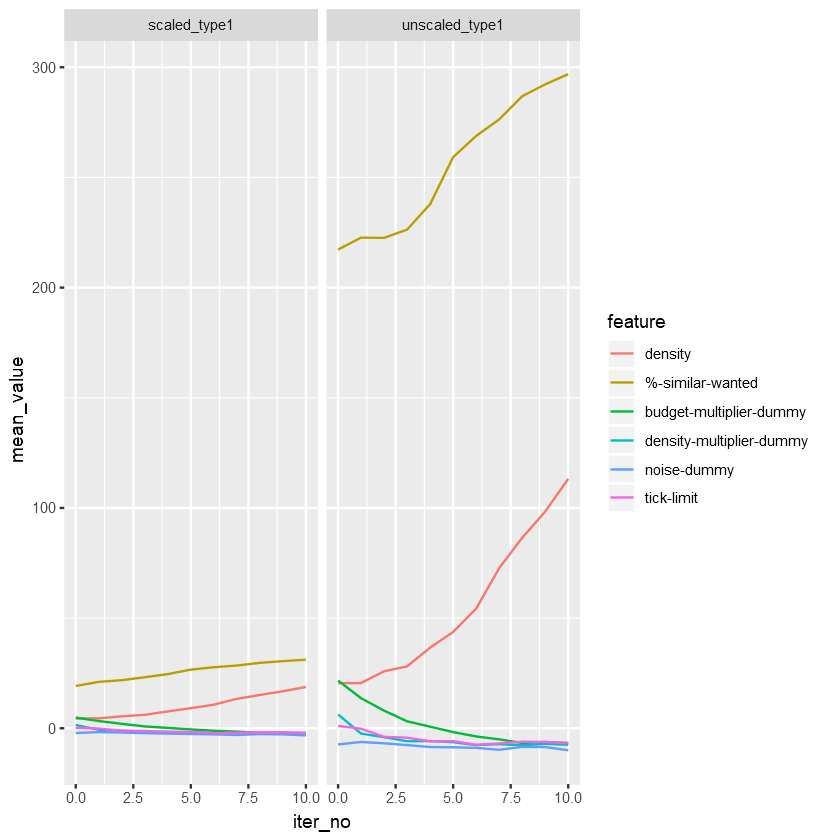

In [41]:
ggplot(b[type %in% c("scaled_type1","unscaled_type1")], aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() + facet_wrap(~type)

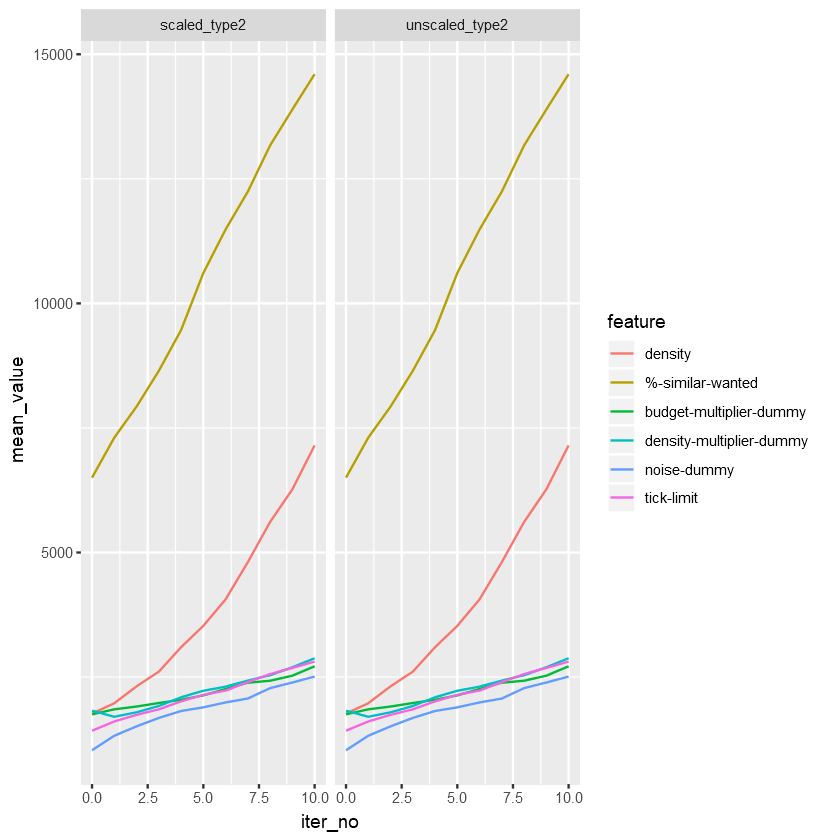

In [42]:
ggplot(b[!(type %in% c("scaled_type1","unscaled_type1"))], aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() + facet_wrap(~type)

*mtry = 4 olduğunda, scaled olduğunda da density, budget-multiplier-dummy'den daha yüksek importance'a sahip.*

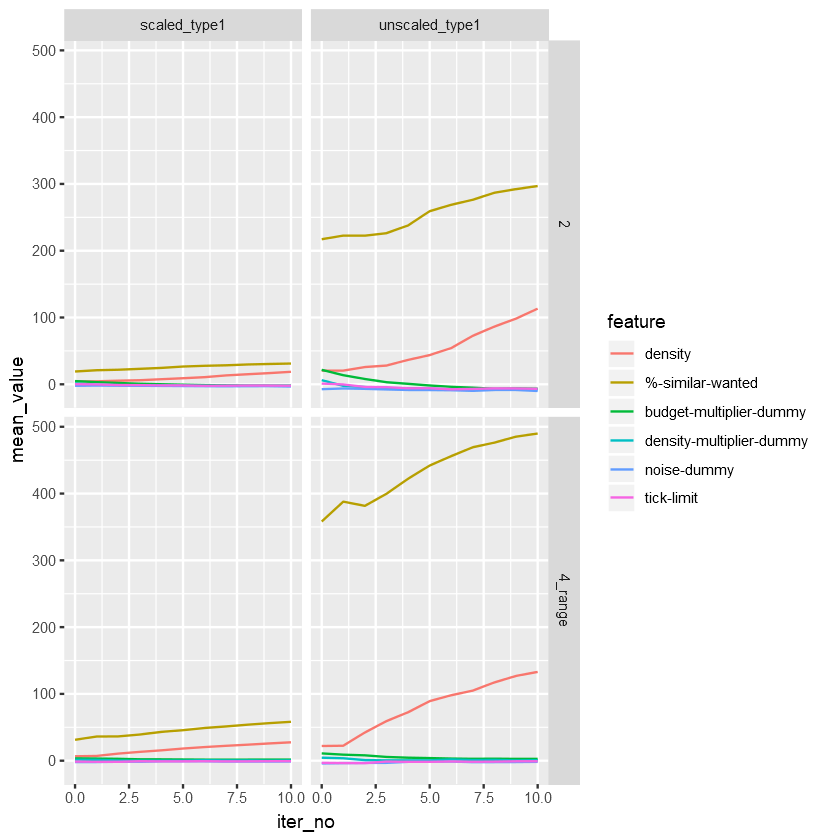

In [43]:
b_mtry = mtry_group_imp.2[,.(mean_value = mean(value, na.rm = TRUE)),.(iter_no,feature,type,mtry)]

ggplot(b_mtry[type %in% c("scaled_type1","unscaled_type1")], aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() + facet_grid(mtry~type)

In [44]:
b_mtry[type == "scaled_type1" & (feature %in% c("density","budget-multiplier-dummy")) & iter_no == 0]

iter_no,feature,type,mtry,mean_value
<dbl>,<fct>,<chr>,<chr>,<dbl>
0,density,scaled_type1,2,4.428751
0,budget-multiplier-dummy,scaled_type1,2,4.870098
0,density,scaled_type1,4_range,6.672754
0,budget-multiplier-dummy,scaled_type1,4_range,3.547374


### Importance

In [45]:
importance_compare.2 = rbind( data.table(group_importance_Ad.1,type = "1basic_Ad_sd")
                             ,data.table(group_importance_Ad.2,type = "1dummy_Ad_sd")
                             ,data.table(group_importance_Ad3.2,type = "2dummy_Ad_sd_mtry3")  
                             ,data.table(group_importance_Ad4.2,type = "3dummy_Ad_sd_mtry4")
                             ,data.table(group_importance_Ad6.2,type = "4dummy_Ad_sd_mtry6")
                             ,data.table(group_importance_Ad_range.2, type = "5dummy_Ad_range")
                             ,data.table(group_importance_Ad4_range.2, type = "6dummy_Ad_range_mtry4")
                             ,data.table(group_importance_Ad_coefvar.2, type = "7dummy_Ad_coefvar"))
importance_compare.2 = importance_compare.2[seed %in% seed.focus]

ave_importance_compare.2 = importance_compare.2[,.(mean_value = mean(value, na.rm = TRUE)),.(iter_no,feature,type)]

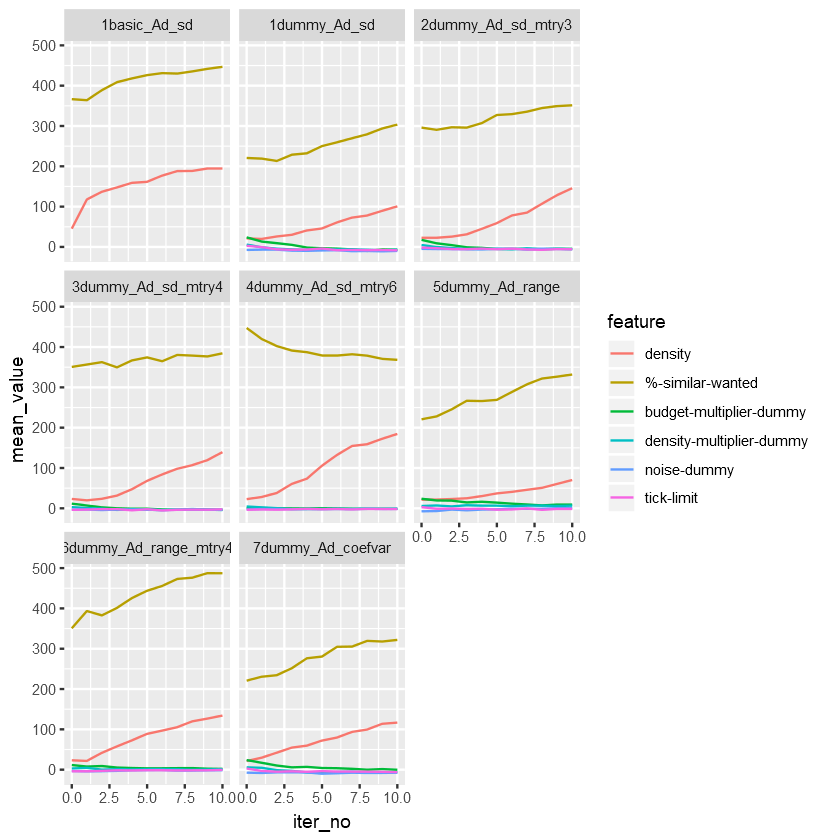

In [46]:
ave_importance.plot.2 = ggplot(ave_importance_compare.2, aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() +
                          facet_wrap(~type)      
                          #geom_smooth(method = "gam", formula = y ~ poly(x, 3)) 
                          #geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
                          #geom_vline(xintercept = iteration_history_Ad.3[IsFeatureEliminated==1]$iter_no + 1, linetype = "dashed") 
ave_importance.plot.2

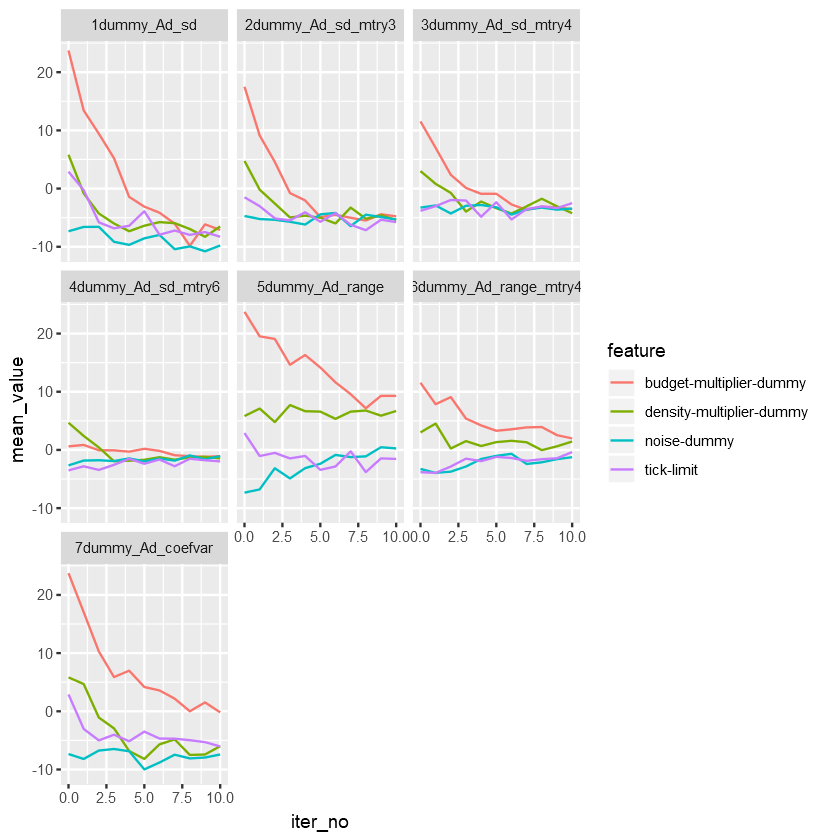

In [47]:
 ggplot(ave_importance_compare.2[!(feature %in% feature_names.1)], aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() +
                          facet_wrap(~type)  